In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
mouse_data = "pymaceuticals_data/Mouse_metadata.csv"
study_results = "pymaceuticals_data/Study_results.csv"
mouse_df = pd.read_csv(mouse_data)
results_df = pd.read_csv(study_results)

In [4]:
merged_df = pd.merge(mouse_df, results_df, on="Mouse ID", how="outer")

In [5]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
merged_df["Mouse ID"].nunique()

249

In [7]:
duplicated = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
clean_merged_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
clean_merged_df["Mouse ID"].nunique()

248

In [10]:
clean_merged_df[clean_merged_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [11]:
mean_tumorv = clean_merged_df.groupby(clean_merged_df["Drug Regimen"])[
    "Tumor Volume (mm3)"
].mean()
median_tumorv = clean_merged_df.groupby(clean_merged_df["Drug Regimen"])[
    "Tumor Volume (mm3)"
].median()
variance_tumorv = clean_merged_df.groupby(clean_merged_df["Drug Regimen"])[
    "Tumor Volume (mm3)"
].var()
deviation_tumorv = clean_merged_df.groupby(clean_merged_df["Drug Regimen"])[
    "Tumor Volume (mm3)"
].std()
sem_tumorv = clean_merged_df.groupby(clean_merged_df["Drug Regimen"])[
    "Tumor Volume (mm3)"
].sem()

In [12]:
drugs = clean_merged_df["Drug Regimen"].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [13]:
study_stats = pd.DataFrame(
    {
        "Mean": mean_tumorv,
        "Median": median_tumorv,
        "Varuance": variance_tumorv,
        "Standard Deviation": deviation_tumorv,
        "SEM": sem_tumorv,
    },
    index=drugs,
)

In [14]:
study_stats

,Mean,Median,Varuance,Standard Deviation,SEM
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [15]:
study_stats_2 = clean_merged_df.groupby(["Drug Regimen"]).agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
study_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
drug_group = clean_merged_df.groupby("Drug Regimen")
drug_mouse_count = drug_group["Mouse ID"].nunique()
drug_mouse_count
mouse_count = pd.Series(drug_mouse_count)

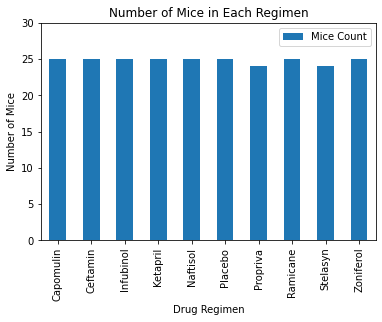

In [17]:
drug_mouse_count.plot(kind="bar", title="Number of Mice in Each Regimen")
plt.legend(["Mice Count"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim([0, 30])
plt.show()

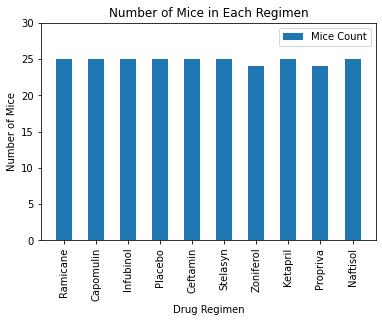

In [18]:
plt.title("Number of Mice in Each Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.ylim([0, 30])
plt.bar(drugs, drug_mouse_count, label="Mice Count", width=0.5)
plt.legend()
plt.show()

In [19]:
gender_dem = clean_merged_df.groupby("Sex")["Mouse ID"].nunique()
gender_dem

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

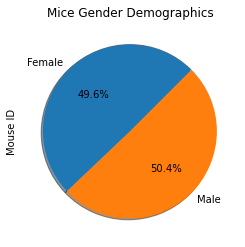

In [20]:
plt.title("Mice Gender Demographics")
gender_dem.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=45)
plt.show()

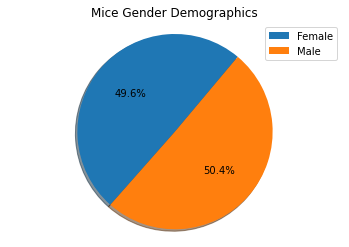

In [21]:
plt.title("Mice Gender Demographics")
plt.pie(gender_dem, autopct="%1.1f%%", shadow=True, startangle=50)
plt.axis("equal")
plt.legend(["Female", "Male"])
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
best_drug = clean_merged_df.loc[
    (
        clean_merged_df["Drug Regimen"].isin(
            ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
        )
    )
]
best_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [23]:
last_time = best_drug.sort_values("Timepoint", ascending=False)
last_time = last_time.drop_duplicates("Mouse ID", keep="first")
last_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [24]:
regimen_list = last_time["Drug Regimen"].unique()

## Line and Scatter Plots

In [25]:
clean_merged_df.loc[clean_merged_df["Mouse ID"] == "s185"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


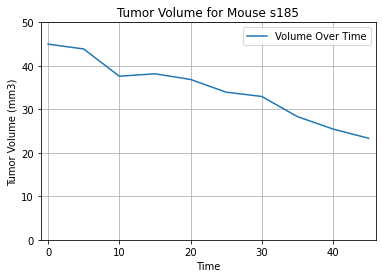

In [26]:
capom_df = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Capomulin"]
capom_mouse = clean_merged_df.loc[clean_merged_df["Mouse ID"] == "s185"]
plt.plot(
    capom_mouse["Timepoint"],
    capom_mouse["Tumor Volume (mm3)"],
    label="Volume Over Time",
)
plt.title("Tumor Volume for Mouse s185")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid()
plt.xlim([-1, 46])
plt.ylim([0, 50])
plt.show()

In [27]:
mouse_capom = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Capomulin"]
capom_group = mouse_capom.groupby("Mouse ID").mean()
capom_group

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


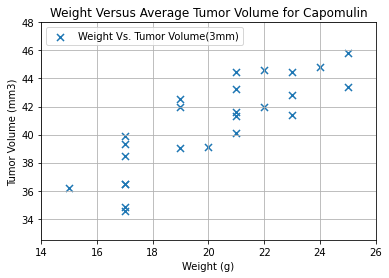

In [28]:
capom_group.plot(
    kind="scatter",
    x="Weight (g)",
    y="Tumor Volume (mm3)",
    marker="x",
    s=50,
    grid=True,
    label="Weight Vs. Tumor Volume(3mm)",
)
plt.title("Weight Versus Average Tumor Volume for Capomulin")
plt.legend(loc=2)
plt.xlim([14, 26])
plt.ylim([32.5, 48])
plt.show()

## Correlation and Regression

In [29]:
x = capom_group["Weight (g)"]
y = capom_group["Tumor Volume (mm3)"]
(slope, intercept, r, p, stderr) = linregress(x, y)
line = x * slope + intercept

r = round(x.corr(y), 5)
print(f"Pearsons correlation: {r}")

Pearsons correlation: 0.84194


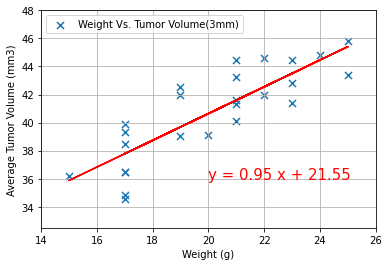

In [30]:
capom_group.plot(
    kind="scatter",
    x="Weight (g)",
    y="Tumor Volume (mm3)",
    marker="x",
    s=50,
    grid=True,
    label="Weight Vs. Tumor Volume(3mm)",
)
plt.legend(loc=2)
plt.plot(x, line, color="red")
plt.annotate(
    "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2)),
    (20, 36),
    color="red",
    fontsize=15,
)
plt.xlim([14, 26])
plt.ylim([32.5, 48])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()